### Upsampling and downsampling with sklearn

In [1]:
import sklearn
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier

In [2]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

In [3]:
df = pd.read_csv('data/train.csv', '|')
df.fraud.value_counts()

0    1775
1     104
Name: fraud, dtype: int64

### Test on imbalanced data

In [4]:
X_imb = df.drop('fraud', axis=1)
y_imb = df['fraud']

X_train_imb, X_test_imb, y_train_imb, y_test_imb =  train_test_split(X_imb, y_imb, test_size=0.2)

clf_imb = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_imb.fit(X_train_imb, y_train_imb)
clf_imb.score(X_test_imb, y_test_imb)

0.9813829787234043

In [5]:
prob_y_imb = clf_imb.predict_proba(X_test_imb)
prob_y_imb = [p[1] for p in prob_y_imb]

In [6]:
roc_auc_score(y_test_imb, prob_y_imb)

0.9910590277777778

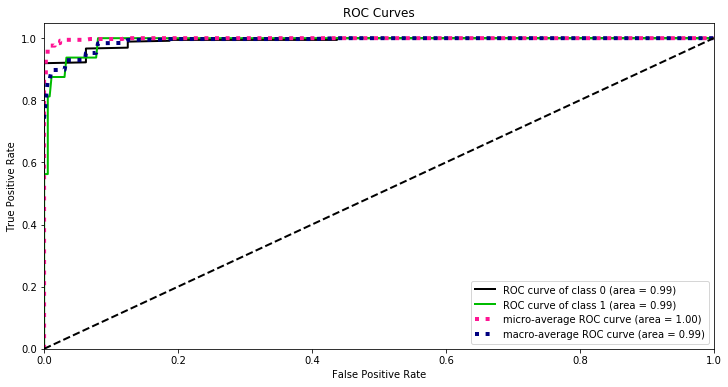

In [7]:
prob_y_imb_vis = clf_imb.predict_proba(X_test_imb)
skplt.metrics.plot_roc(y_test_imb, prob_y_imb_vis)
plt.show()

Precision: 0.8461538461538461, recall: 0.6875, F1: 0.7586206896551724


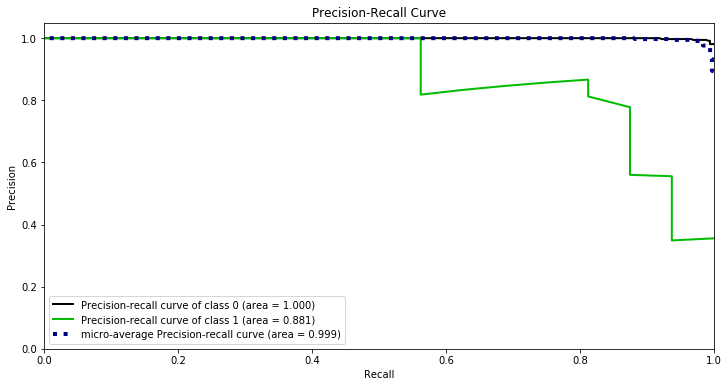

In [8]:
y_imb_pred = clf_imb.predict(X_test_imb)
precision_imb = precision_score(y_test_imb, y_imb_pred)
recall_imb = recall_score(y_test_imb, y_imb_pred)
f1_imb = f1_score(y_test_imb, y_imb_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_imb, recall_imb, f1_imb))

skplt.metrics.plot_precision_recall(y_test_imb, prob_y_imb_vis)
plt.show()

### Down-sampling

In [9]:
df_fraudlent_imbalanced = df[df['fraud'] == 1]
df_non_fraudlent_imbalanced = df[df['fraud'] == 0]
df_non_fraudlent_downsampled = resample(df_non_fraudlent_imbalanced, 
                                        replace=False, 
                                        n_samples=104, 
                                        random_state=123)
df_downsampled = pd.concat([df_fraudlent_imbalanced, df_non_fraudlent_downsampled])
df_downsampled.fraud.value_counts()

1    104
0    104
Name: fraud, dtype: int64

In [10]:
X_down = df_downsampled.drop('fraud', axis=1)
y_down = df_downsampled['fraud']

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.2)

clf_down = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_down.fit(X_train_down, y_train_down)
clf_down.score(X_test_down, y_test_down)

0.9761904761904762

In [11]:
prob_y_down = clf_down.predict_proba(X_test_down)
prob_y_down = [p[1] for p in prob_y_down]

In [12]:
roc_auc_score(y_test_down, prob_y_down)

1.0

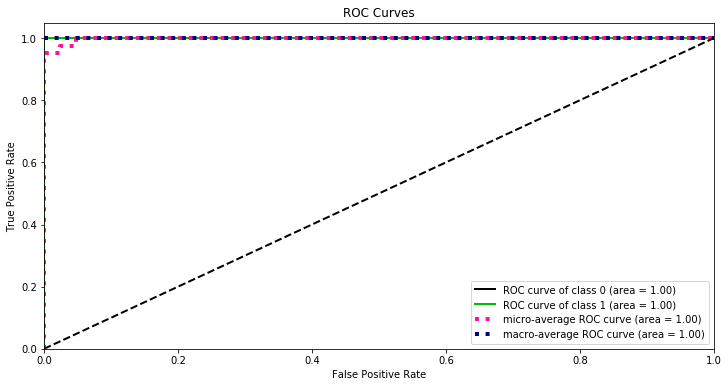

In [13]:
prob_y_down_vis = clf_down.predict_proba(X_test_down)
skplt.metrics.plot_roc(y_test_down, prob_y_down_vis)
plt.show()

Precision: 0.9473684210526315, recall: 1.0, F1: 0.972972972972973


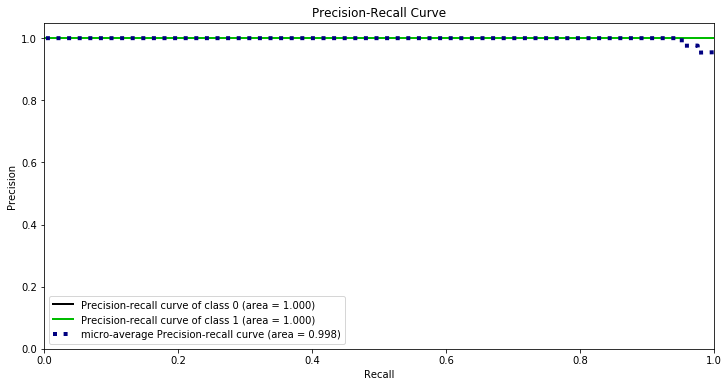

In [14]:
y_down_pred = clf_down.predict(X_test_down)
precision_down = precision_score(y_test_down, y_down_pred)
recall_down = recall_score(y_test_down, y_down_pred)
f1_down = f1_score(y_test_down, y_down_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_down, recall_down, f1_down))

skplt.metrics.plot_precision_recall(y_test_down, prob_y_down_vis)
plt.show()

### Up-sampling

In [15]:
df_fraudlent_imbalanced = df[df['fraud'] == 1]
df_non_fraudlent_imbalanced = df[df['fraud'] == 0]
df_fraudlent_up = resample(df_fraudlent_imbalanced, 
                           replace=True, 
                           n_samples=1775, 
                           random_state=123)
df_upsampled = pd.concat([df_non_fraudlent_imbalanced, df_fraudlent_up])
df_upsampled.fraud.value_counts()

1    1775
0    1775
Name: fraud, dtype: int64

In [16]:
X_up = df_upsampled.drop('fraud', axis=1)
y_up = df_upsampled['fraud']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2)

clf_up = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123) 
clf_up.fit(X_train_up, y_train_up)
clf_up.score(X_test_up, y_test_up)

0.9943661971830986

In [17]:
prob_y_up = clf_up.predict_proba(X_test_up)
prob_y_up = [p[1] for p in prob_y_up]

In [18]:
roc_auc_score(y_test_up, prob_y_up)

1.0

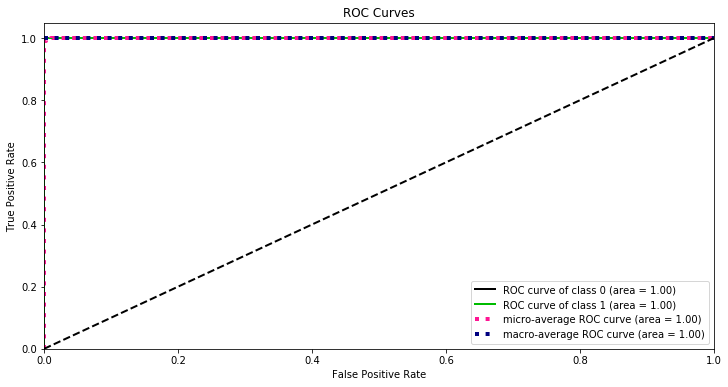

In [19]:
prob_y_up_vis = clf_up.predict_proba(X_test_up)
skplt.metrics.plot_roc(y_test_up, prob_y_up_vis)
plt.show()

Precision: 0.9891304347826086, recall: 1.0, F1: 0.994535519125683


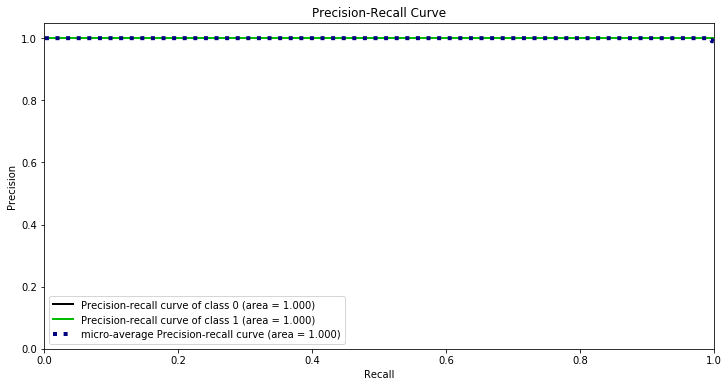

In [20]:
y_up_pred = clf_up.predict(X_test_up)
precision_up = precision_score(y_test_up, y_up_pred)
recall_up = recall_score(y_test_up, y_up_pred)
f1_up = f1_score(y_test_up, y_up_pred)
print('Precision: {}, recall: {}, F1: {}'.format(precision_up, recall_up, f1_up))

skplt.metrics.plot_precision_recall(y_test_up, prob_y_up_vis)
plt.show()